In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163338 sha256=a557bf79632ef745c9fd226fae5e073a4440a3f226dbad80ce4c99bf58b26e74
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [1]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
df = pd.read_csv("Processed_Book_Data_shortened.csv",engine="python")
df.head()

,0,user_id,isbn,rating,book_title,book_author,publisher,img_s,Summary,Language,Category
0,0,2,195153448,0,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science']
1,1,8,2005018,5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
2,2,11400,2005018,0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
3,3,11676,2005018,8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
4,4,41385,2005018,0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']


In [2]:
df.shape

(258879, 11)

In [3]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of factors to see if this parameter affects the performance of the model.  
The default number of factors is 100, hence we will tweak the number of factors from 1-100 to evaluate the performance.

In [4]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
svd_dict = defaultdict(dict)
for i in range(100):
    svd = SVD(n_factors=i+1)
    start_time = time.time()
    svd.fit(train)
    fit_time = time.time() - start_time
    predictions = svd.test(test)
    svd_dict[i+1]['rmse'] = rmse(predictions)
    svd_dict[i+1]['fit_time'] = fit_time
    svd_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
svd_df = pd.DataFrame(svd_dict)
svd_df

RMSE: 3.6663
RMSE: 3.6889
RMSE: 3.6970
RMSE: 3.7087
RMSE: 3.7196
RMSE: 3.7226
RMSE: 3.7302
RMSE: 3.7412
RMSE: 3.7390
RMSE: 3.7463
RMSE: 3.7469
RMSE: 3.7493
RMSE: 3.7491
RMSE: 3.7510
RMSE: 3.7497
RMSE: 3.7529
RMSE: 3.7472
RMSE: 3.7536
RMSE: 3.7598
RMSE: 3.7546
RMSE: 3.7535
RMSE: 3.7631
RMSE: 3.7671
RMSE: 3.7596
RMSE: 3.7657
RMSE: 3.7587
RMSE: 3.7601
RMSE: 3.7606
RMSE: 3.7632
RMSE: 3.7611
RMSE: 3.7598
RMSE: 3.7582
RMSE: 3.7655
RMSE: 3.7583
RMSE: 3.7640
RMSE: 3.7586
RMSE: 3.7595
RMSE: 3.7584
RMSE: 3.7576
RMSE: 3.7616
RMSE: 3.7608
RMSE: 3.7573
RMSE: 3.7539
RMSE: 3.7610
RMSE: 3.7656
RMSE: 3.7544
RMSE: 3.7601
RMSE: 3.7596
RMSE: 3.7525
RMSE: 3.7595
RMSE: 3.7578
RMSE: 3.7543
RMSE: 3.7576
RMSE: 3.7552
RMSE: 3.7564
RMSE: 3.7531
RMSE: 3.7634
RMSE: 3.7504
RMSE: 3.7492
RMSE: 3.7510
RMSE: 3.7473
RMSE: 3.7531
RMSE: 3.7505
RMSE: 3.7483
RMSE: 3.7537
RMSE: 3.7504
RMSE: 3.7498
RMSE: 3.7447
RMSE: 3.7513
RMSE: 3.7540
RMSE: 3.7512
RMSE: 3.7540
RMSE: 3.7450
RMSE: 3.7426
RMSE: 3.7457
RMSE: 3.7528
RMSE: 3.7508

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,3.666309,3.688938,3.696968,3.708707,3.719618,3.722588,3.730233,3.741229,3.738999,3.746259,...,3.745460,3.740251,3.739907,3.739962,3.740537,3.743421,3.743541,3.741374,3.744800,3.735868
fit_time,1.292220,1.131896,1.185412,1.116658,1.124120,1.128489,1.218401,1.248434,1.143294,1.244354,...,1.852192,1.864984,1.942049,1.951601,2.067378,2.051733,1.928671,2.093101,1.939905,1.900976
prediction_time,0.330996,0.351928,0.350322,0.347711,0.344638,0.280394,0.383227,0.375738,0.349503,0.329749,...,0.342058,0.340782,0.349306,0.384926,0.348883,0.258480,0.352706,0.340989,0.325796,0.331857


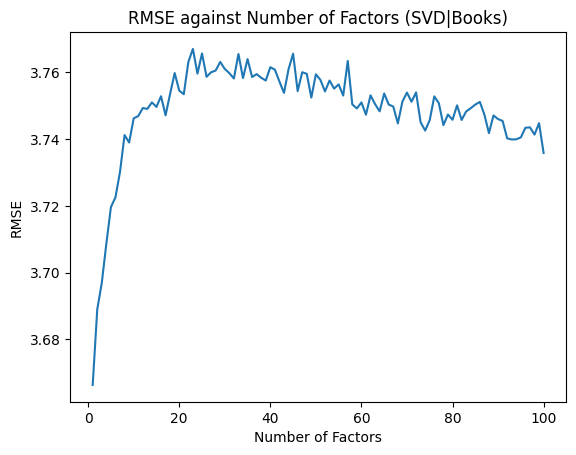

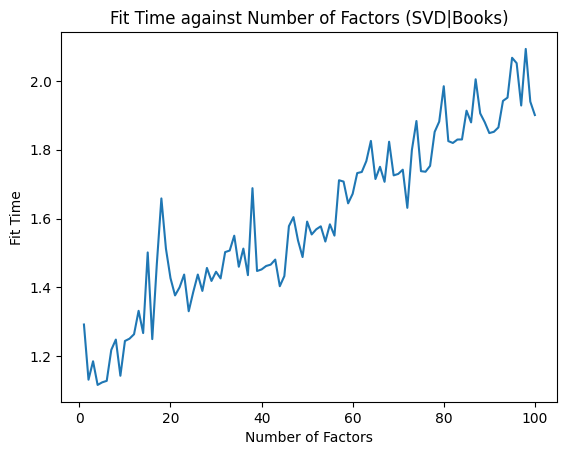

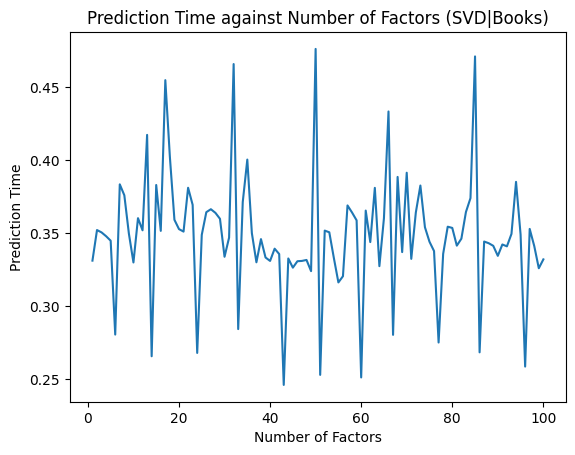

In [5]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(svd_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors (SVD|Books)')
plt.show()

plt.plot(svd_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors (SVD|Books)')
plt.show()

plt.plot(svd_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors (SVD|Books)')
plt.show()


We will be using the default parameters set in the SVD for our comparison between the different algorithms.

In [6]:
import time
svd = SVD()
begin_fit = time.time()
svd.fit(train)
end_fit = time.time()
begin_predict = time.time()
svd.test(test)
end_predict = time.time()
result = rmse(svd.test(test))
row = {"Algorithm":"SVD","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

RMSE: 3.7440
{'Algorithm': 'SVD', 'Fit Time': 2.5562710762023926, 'Prediction Time': 0.6300222873687744}


In [8]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "User-ID",
    1: "isbn",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = svd.predict(row["User-ID"], row["isbn"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = '{:.2f}'.format(abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf

,User-ID,isbn,Actual Rating,Predicted Rating,Error
0,35609,8420636282,9.0,4.496480,4.50
1,30711,449221482,8.0,1.000000,7.00
2,266866,006052779X,0.0,2.591021,2.59
3,265115,446605239,0.0,2.953873,2.95
4,189835,440498058,5.0,5.000000,0.00
...,...,...,...,...,...
64715,265784,836221192,0.0,3.515983,3.52
64716,117937,553582747,0.0,3.824521,3.82
64717,114988,142002267,0.0,5.000000,5.00
64718,187145,399150897,0.0,3.400608,3.40


In [9]:
worst_predictions = testdf.sort_values(by='Error',ascending=False)[:50]
best_predictions = testdf.sort_values(by='Error',ascending=False)[-50:]

best_predictions

,User-ID,isbn,Actual Rating,Predicted Rating,Error
25521,258884,553292722,5.0,5.00000,0.00
64186,248718,553573403,5.0,5.00000,0.00
19033,11676,3404122763,5.0,5.00000,0.00
46936,24188,971880107,1.0,1.00000,0.00
55922,167471,316666343,5.0,5.00000,0.00
54651,11676,61093092,5.0,5.00000,0.00
8686,4197,875964249,5.0,5.00000,0.00
6876,178199,449000265,5.0,5.00000,0.00
3265,95574,385504209,5.0,5.00000,0.00
20366,273113,373270976,5.0,5.00000,0.00


In [10]:
worst_predictions

,User-ID,isbn,Actual Rating,Predicted Rating,Error
23838,35859,451183746,10.0,1.0,9.00
28698,74758,440226430,10.0,1.0,9.00
5679,204813,446527793,10.0,1.0,9.00
36388,11601,451821971,10.0,1.0,9.00
25830,255218,64400026,10.0,1.0,9.00
321,255218,038549565X,10.0,1.0,9.00
55519,167800,345368940,10.0,1.0,9.00
64278,217375,446530522,10.0,1.0,9.00
41237,235935,142001740,10.0,1.0,9.00
55158,69697,671034065,10.0,1.0,9.00
